## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
import numpy as np

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


In [4]:
x_train

array([[ 0.04685422,  1.85744506],
       [-1.89642928,  2.01760024],
       [-1.83469904,  1.97235127],
       ...,
       [-1.30902178,  3.71940461],
       [-0.84035215, -0.62895994],
       [ 1.34668784, -1.16946477]])

In [5]:
x_train[:, 1]
# Matrix同一axis的方向上取範圍，這是list做不到的
# https://www.ycc.idv.tw/python-play-with-data_3.html

array([ 1.85744506e+00,  2.01760024e+00,  1.97235127e+00,  9.06533688e-01,
        1.17585762e+00, -9.87996990e-01,  1.03239291e+00,  1.54991982e+00,
        8.15788269e-02,  4.55796463e-01, -2.62092794e+00, -6.04565983e-01,
       -1.43357521e+00, -1.77935908e+00,  3.98145923e-01,  7.03663242e-01,
        2.23556499e+00, -1.34108130e+00, -2.62297321e+00,  1.42410264e+00,
       -4.21338708e-01, -1.12147924e+00, -1.53544356e+00, -1.27480906e+00,
       -1.64618521e+00, -2.53477672e+00,  3.41771370e+00,  4.92011684e-01,
       -2.68760442e+00, -2.05492191e+00, -4.27273328e-01,  1.94723423e+00,
        1.90411042e+00, -9.19300372e-01, -1.18993292e+00, -2.58269724e+00,
       -1.70180941e+00, -2.27801342e+00,  1.11758224e+00, -2.06569516e+00,
       -5.42282431e-01,  1.51957268e+00, -1.31626132e+00, -1.61899258e+00,
       -5.38396049e-01,  1.54570045e+00, -1.77083280e+00,  2.75154536e+00,
        1.07404332e+00,  1.22408341e+00, -9.70500397e-01, -1.59381767e+00,
       -1.60984883e+00, -

In [6]:
y_train   # y是分群 label

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [8]:
# Sepereate 2 group
class1 = []
class2 = []

for i in range(750):
    if y_train[i] == 0:
        class1.append(x_train[i])
    else:
        class2.append(x_train[i])
class1 = np.array(class1)
class2 = np.array(class2)

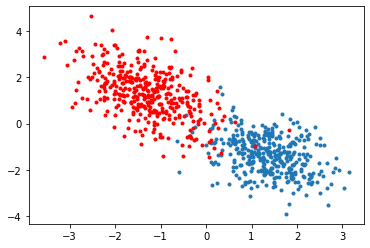

In [16]:
# Take a look at the data
plt.plot(class1[:, 0], class1[:, 1], '.')
plt.plot(class2[:, 0], class2[:, 1], '.', color='red')

plt.show()

In [17]:
print(class1.shape)
print(class2.shape)

(369, 2)
(381, 2)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [18]:
# Your code HERE
# 要分群 目前的是全部的 mean
m1 = np.array([class1[:, 0].mean(), class1[:, 1].mean()])
m2 = np.array([class2[:, 0].mean(), class2[:, 1].mean()])
print(m1)
print(m2)

[ 1.3559426  -1.34746216]
[-1.29735587  1.29096203]


In [19]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 1.3559426  -1.34746216] mean vector of class 2: [-1.29735587  1.29096203]


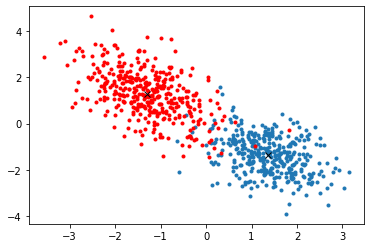

In [20]:
# Lable m1,m2 by 'x' on the graph
plt.plot(class1[:, 0], class1[:, 1], '.')
plt.plot(class2[:, 0], class2[:, 1], '.', color='red')
plt.plot(m1[0], m1[1], 'x', color='black')
plt.plot(m2[0], m2[1], 'x', color='black')

plt.show()

## 2. Compute the Within-class scatter matrix SW

In [22]:
# Your code HERE (應該是這個)
S1 = np.zeros((x_train.shape[1], x_train.shape[1]))
S2 = np.zeros((x_train.shape[1], x_train.shape[1]))
Sw = np.zeros((x_train.shape[1], x_train.shape[1]))

for i in class1:
    t = (i - m1).reshape(1, x_train.shape[1])
    S1 += np.dot(t.T, t)
for j in class2:
    t = (j - m2).reshape(1, x_train.shape[1])
    S2 += np.dot(t.T, t)

Sw = S1+S2
print(Sw)

[[ 388.64001349 -228.92177708]
 [-228.92177708  665.56910433]]


In [26]:
assert Sw.shape == (2, 2)
print(f"Within-class scatter matrix SW: {Sw}")

Within-class scatter matrix SW: [[ 388.64001349 -228.92177708]
 [-228.92177708  665.56910433]]


## 3.  Compute the Between-class scatter matrix SB

In [27]:
# Your code HERE (對的?) in 2 class
mu1_mu2 = (m1 - m2).reshape(1, x_train.shape[1])

Sb = np.dot(mu1_mu2.T, mu1_mu2)
print(Sb)

[[ 7.03999279 -7.00052687]
 [-7.00052687  6.9612822 ]]


In [28]:
assert Sb.shape == (2, 2)
print(f"Between-class scatter matrix SB: {Sb}")

Between-class scatter matrix SB: [[ 7.03999279 -7.00052687]
 [-7.00052687  6.9612822 ]]


## 4. Compute the Fisher’s linear discriminant

In [29]:
S_inv_w = np.linalg.inv(Sw)
S_inv_b = S_inv_w.dot(Sb)

eig_vals, eig_vecs = np.linalg.eig(S_inv_b)
print(eig_vals)
print(eig_vecs)

[2.02940745e-02 8.67361738e-19]
[[ 0.94096648  0.70511642]
 [-0.33849976  0.70909156]]


In [30]:
idx = eig_vals.argsort()[::-1]

eig_vals = eig_vals[idx]  # Not needed
eig_vecs = eig_vecs[:, idx]
eig_vecs

array([[ 0.94096648,  0.70511642],
       [-0.33849976,  0.70909156]])

In [31]:
W = eig_vecs[:, :1]
print(W)

[[ 0.94096648]
 [-0.33849976]]


We can just get the first eigen vector since we want to reduce the dimension to 1.
What does it means???
Reference
http://www.adeveloperdiary.com/data-science/machine-learning/linear-discriminant-analysis-from-theory-to-code/?fbclid=IwAR3Nou9j6wDA3AtKlHNU1L4wJmQqb2TEa7sQUyrwEmfKaABNRqQaF4V23cE

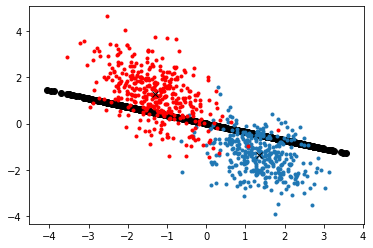

In [32]:
# Lable m1,m2 by 'x' on the graph
for i in x_train:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    plt.scatter(proj[0], proj[1], color='black')

plt.plot(class1[:, 0], class1[:, 1], '.')
plt.plot(class2[:, 0], class2[:, 1], '.', color='red')
plt.plot(m1[0], m1[1], 'x', color='black')
plt.plot(m2[0], m2[1], 'x', color='black')

plt.show()

In [33]:
assert W.shape == (2, 1)
print(f" Fisher’s linear discriminant: {W}")

 Fisher’s linear discriminant: [[ 0.94096648]
 [-0.33849976]]


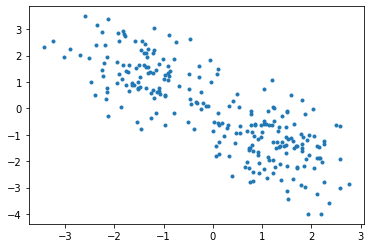

In [34]:
plt.plot(x_test[:, 0], x_test[:, 1], '.')

plt.show()

# Threshold Method (自己練習用)

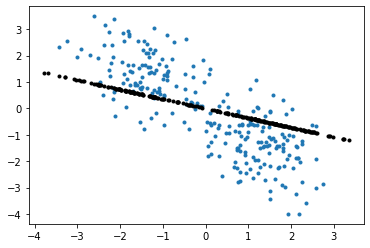

In [35]:
proj_list = []
for i in x_test:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_list.append(proj)

plt.plot(x_test[:, 0], x_test[:, 1], '.')
proj_list = np.array(proj_list)
plt.plot(proj_list[:, 0], proj_list[:, 1], '.', color='black')

plt.show()

For a two class problem the classifier is: 

 X in C2 if  W^TX + w1 > 0  or  X in C1 if W^TX + w1 < 0

In this the threshold value, w1 we should calculate. The simple metric for this threshold is the average of the projected means of the two classes on to W axis.

i.e if m1 is the projected mean of class 1, and m2 is the projected mean of class 2. Then,
 
w1 = (m1+m2)/2

In [36]:
proj_list1 = []
proj_list2 = []

for i in class1:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_list1.append(proj)

for i in class2:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_list2.append(proj)
proj_list1 = np.array(proj_list1)
proj_list2 = np.array(proj_list2)

mu1 = np.array([proj_list1[:, 0].mean(), proj_list1[:, 1].mean()])
mu2 = np.array([proj_list2[:, 0].mean(), proj_list2[:, 1].mean()])

Threshold = (mu1+mu2)/2

print(Threshold)

[ 0.034935   -0.01256738]


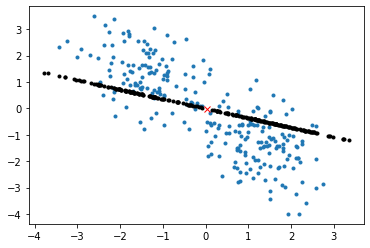

In [37]:
proj_list=[]
for i in x_test:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_list.append(proj)

plt.plot(x_test[:,0], x_test[:,1], '.')
proj_list = np.array(proj_list)
plt.plot(proj_list[:,0], proj_list[:,1], '.',color='black')
plt.plot(Threshold[0], Threshold[1], 'x',color='red')

plt.show()

http://aitechcentral.com/blog/implementation-of-fishers-lda-in-python/
    
So given a test pattern X then if

WTX > Threshold then X is classified as Class 1
WTX < Threshold then X is classified as Class 2

In [38]:
y_pred = []
for i in x_test:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    if proj[0] < Threshold[0]:
        y_pred.append([1])
    else:
        y_pred.append([0])

y_pred = np.array(y_pred)
print(y_pred.shape)

(250, 1)


In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [40]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.964


## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [43]:
proj_train = []   
for i in x_train:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_train.append(proj)

proj_train = np.array(proj_train)


In [50]:
# proj_list  -->  Projected x_test
# proj_train -->  Projected x_train
# Calculate euclidean_distance for each point
def euclidean_distance(a,b):
    dist = np.linalg.norm(a - b)
    return dist

predict =[]
for i in  proj_list :
    distance =[]
    for j in range(len(proj_train)):
        d = euclidean_distance(i,proj_train[j])
        distance.append([d])
    distance = np.array(distance)
    s = np.where(distance==np.min(distance))
    s= int(s[0])
    if y_train[s]==0:
        predict.append([0])
    else:
        predict.append([1])
        

predict = np.array(predict)
            
predict.shape   
    

(250, 1)

In [51]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)

In [52]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.916


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [53]:
slope = float(W[1]/W[0])

slope

-0.3597362616341834

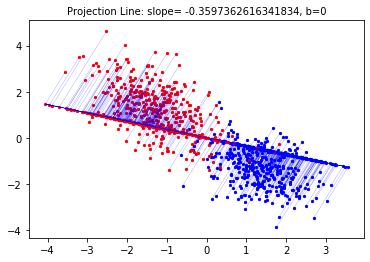

In [59]:
# Project Training data
proj_train = []

for i in x_train:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    proj_train.append(proj)

proj_train = np.array(proj_train)


for i in class1:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    plt.scatter(i[0], i[1], s=5, color='blue')
    plt.scatter(proj[0], proj[1], s=5, color='blue')
    plt.plot([i[0], proj[0]], [i[1], proj[1]],
             color='blue', linewidth=0.3, alpha=0.5)

for i in class2:
    proj = (np.dot(i, W) * W) / np.dot(W.T, W)
    plt.scatter(i[0], i[1], s=5, color='red')
    plt.scatter(proj[0], proj[1], s=5, color='red')
    plt.plot([i[0], proj[0]], [i[1], proj[1]],
             color='blue', linewidth=0.3, alpha=0.5)

plt.plot(proj_train[:, 0], proj_train[:, 1], color='blue', linewidth=0.5)
#plt.plot([-1, 5], [-slope, 5*slope], color='k', linestyle='-', linewidth=1)
plt.title("Projection Line: slope= -0.3597362616341834, b=0", fontsize=10)

plt.show()